In [12]:
import pandas as pd , matplotlib.pyplot as plt, seaborn as sns , numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from dmba import classificationSummary
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

In [2]:
# reading our data file which in Xlsx format
df = pd.read_excel("C:\\Users\\dell\\OneDrive\\Desktop\\Machine learning 2\\MLdataset_reduced countries.xlsx")

In [3]:
# checking the top 5 rows to see everything loaded right
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Id,Category Name,Customer Country,Customer Id,Customer State,Department Id,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Name,Product Status,Shipping Mode
0,DEBIT,3,4,0,73,Sporting Goods,Puerto Rico,20755,PR,2,...,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,Smart watch,0,Standard Class
1,TRANSFER,5,4,1,73,Sporting Goods,Puerto Rico,19492,PR,2,...,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,Smart watch,0,Standard Class
2,CASH,4,4,0,73,Sporting Goods,U.S,19491,CA,2,...,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,Smart watch,0,Standard Class
3,DEBIT,3,4,0,73,Sporting Goods,U.S,19490,CA,2,...,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,Smart watch,0,Standard Class
4,PAYMENT,2,4,0,73,Sporting Goods,Puerto Rico,19489,PR,2,...,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,Smart watch,0,Standard Class


In [4]:
# taking the overview of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145540 entries, 0 to 145539
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           145540 non-null  object 
 1   Days for shipping (real)       145540 non-null  int64  
 2   Days for shipment (scheduled)  145540 non-null  int64  
 3   Late_delivery_risk             145540 non-null  int64  
 4   Category Id                    145540 non-null  int64  
 5   Category Name                  145540 non-null  object 
 6   Customer Country               145540 non-null  object 
 7   Customer Id                    145540 non-null  int64  
 8   Customer State                 145540 non-null  object 
 9   Department Id                  145540 non-null  int64  
 10  Department Name                145540 non-null  object 
 11  Market                         145540 non-null  object 
 12  Order Country                 

In [5]:
# checking for the null values in the dataset
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer Country                 0
Customer Id                      0
Customer State                   0
Department Id                    0
Department Name                  0
Market                           0
Order Country                    0
Order Customer Id                0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region                     0
Order State                      0
Product Name                     0
Product Status                   0
Shipping Mode       

In [6]:
# selecting the features we want to use as input to train our neural network model 
features = ['Category Id','Department Id','Late_delivery_risk','Customer Country','Order Country','Order Item Quantity','Shipping Mode']

In [7]:
df[features]

,Category Id,Department Id,Late_delivery_risk,Customer Country,Order Country,Order Item Quantity,Shipping Mode
0,73,2,0,Puerto Rico,Indonesia,1,Standard Class
1,73,2,1,Puerto Rico,India,1,Standard Class
2,73,2,0,U.S,India,1,Standard Class
3,73,2,0,U.S,Australia,1,Standard Class
4,73,2,0,Puerto Rico,Australia,1,Standard Class
...,...,...,...,...,...,...,...
145535,45,7,0,U.S,China,1,Standard Class
145536,45,7,0,U.S,China,1,Standard Class
145537,45,7,1,U.S,Australia,1,Standard Class
145538,45,7,0,Puerto Rico,Australia,1,Standard Class


In [8]:
# we created dummy variables for the categories coloumn so that we can use them in modelling and saved in X variable
X = pd.get_dummies(df[features]).astype(int)

In [9]:
# we created y variable to assign the sales coloumn for our dataset , which will act as a output coloumn i.e what we want to predict  
y = df['Sales']

In [10]:
# we splitted the data into 70-30 ratio , 70 % is used to train the 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [11]:
X_train

,Category Id,Department Id,Late_delivery_risk,Order Item Quantity,Customer Country_Puerto Rico,Customer Country_U.S,Order Country_Argentina,Order Country_Australia,Order Country_Brazil,Order Country_China,...,Order Country_Panama,Order Country_Philippines,Order Country_Spain,Order Country_Turkey,Order Country_United Kingdom,Order Country_United States,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
95686,43,7,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4158,24,5,1,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
71673,18,4,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
62000,46,7,1,4,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
31649,29,5,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35391,17,4,1,5,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
87684,24,5,0,2,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
55293,24,5,1,3,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
49751,48,7,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Elastic model

In [14]:
l1_ratio = [0.1,0.2,0.5,0.8,1]
alpha = [0.1,0.2,0.5,1]
param_grid= {'l1_ratio':l1_ratio,'alpha':alpha}
els = ElasticNet()

elastic_model = GridSearchCV(estimator=els,param_grid=param_grid,cv=5,scoring='neg_root_mean_squared_error')
elastic_model.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1],
                         'l1_ratio': [0.1, 0.2, 0.5, 0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [15]:
els_pred = elastic_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test,els_pred))

125.90130354230432

# SVR

In [17]:
model_svr = SVR()
model_svr.fit(X_train,y_train)
svr_pred = model_svr.predict(X_test)
np.sqrt(mean_squared_error(y_test,svr_pred))



# MPLRegressor

In [28]:
# finding the optimum value for the hidden layer size
error = []

for i in range(20,72):
            mlpr = MLPRegressor(hidden_layer_sizes=i)
            mlpr.fit(X_train,y_train)
            y_pred = mlpr.predict(X_test)
            errors = np.sqrt(mean_squared_error(y_test,y_pred))

            error.append(errors)


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\AppDa

Text(0, 0.5, 'RMSE')

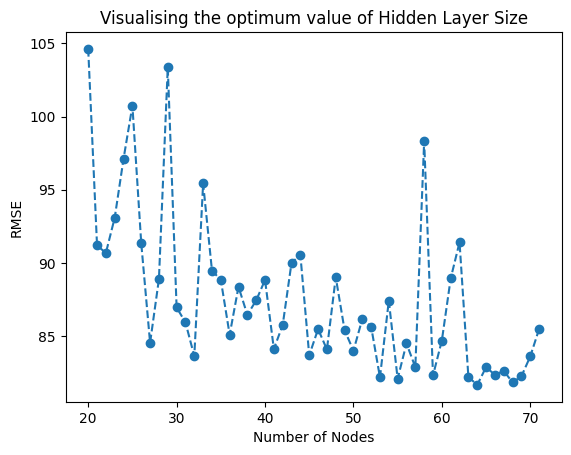

In [38]:
# we created the plot to visualise which value is best for our model 
plt.plot(range(20,72),error,'o--')
plt.title('Visualising the optimum value of Hidden Layer Size')
plt.xlabel("Number of Nodes")
plt.ylabel("RMSE")


In [40]:
# value of error with node size 27
error[7]

84.53626630415198

In [42]:
# value of error with node size 55
error[35]

82.08073212718084

In [41]:
#value of error with node size 64
error[44]

81.66048341215254

# building the final Model 

In [43]:
#final model created after finding the best size of hidden layer
final_model = MLPRegressor(hidden_layer_sizes=27)
final_model.fit(X,y)

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=27)

In [51]:
category_list = list(df['Category Id'].unique())

# Predicting on Test data

In [104]:
# importing the test file 
df_1 = pd.read_excel("C:\\Users\\dell\\OneDrive\\Desktop\\Machine learning 2\\predictind_dataset.xlsx")


#### coverting it to do predicton

In [105]:

df_1 = df_1[features]

In [106]:
df_1 = pd.get_dummies(df_1).astype(int)

In [107]:
# adding the predictions based on categories in prediction list
prediction = []

for i in category_list:

           df_p = df_1[i == df_1['Category Id']]

           preds = final_model.predict(df_p)
           sum_result = np.sum(preds)
           prediction.append(sum_result)
                   

In [114]:
# creating data frame by the name 
output = pd.DataFrame({'Category': category_list,'Predicton':prediction})

In [115]:
# Export the DataFrame to an Excel file
filepath = "C:\\Users\\dell\\OneDrive\\Desktop\\Machine learning 2\\output.xlsx"
output.to_excel(filepath, index=False)